# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 12, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Jade Dubbeld, 11692065

Maickel Hartlief, 14015277

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit

----------------

# Exercise 1 (4.5 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [53]:
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

Plot the observed and modeled data and make a separate plot of the residuals.

Optimal values: P0 = 0.2827705083406508 and r = 1.7494029615158233


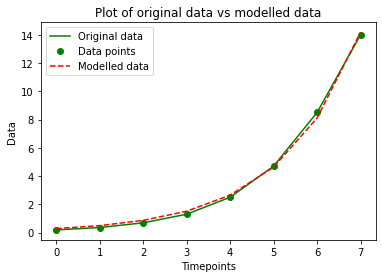

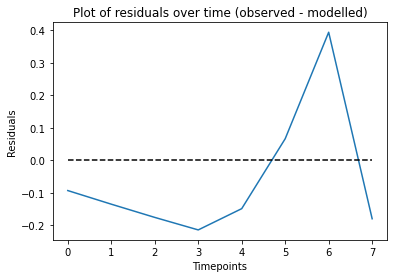

In [105]:
# YOUR CODE HERE
def func(t,x1,x2):
    """
    Defining model function.
    
    Parameters:
    - t (nd_array): Timepoints
    - x (nd_array): x1 and x2 values
    
    Returns:
    - f (nd_array): 
    """
    
    return x1 * x2**t

t = np.arange(len(data))

popt, pcov = curve_fit(func, t, data)

x1 = popt[0]
x2 = popt[1]

print(f"Optimal values: P0 = {x1} and r = {x2}")
# print(pcov)

plt.plot(t,data,'g',label='Original data')
plt.plot(t,data,'go',label='Data points')
plt.plot(t, func(t, *popt),'r--',label='Modelled data')
plt.xlabel('Timepoints')
plt.ylabel('Data')
plt.title('Plot of original data vs modelled data')
plt.legend()
plt.show()

y = func(t,x1,x2)
residuals = data - y

plt.plot(t,residuals)
plt.plot(t,[0]*t,'k--')
plt.xlabel('Timepoints')
plt.ylabel('Residuals')
plt.title('Plot of residuals over time (observed - modelled)')
plt.show()

# (b) 
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( f_i(x) - y_i) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| F(x) - Y \|^2
$$
with $F(x) = T f(x)$  , $Y = T y$, where $T$ is the diagonal matrix with $\frac{1}{\sigma_i}$ on the diagonal. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0 = x_1$ and $r = x_2$.
Plot the observed and modeled data and make a separate plot of the residuals.

Are the results different from those of part (a)? Discuss and explain the differences.


In [ ]:
# YOUR CODE HERE


Your answer here

----------------------
# Exercise 2 (4.5 points)



# (a) 
Let $f(x) = 1/x^2$ and $a=10^{-3}$ and $b=1$. Make a plot of the graph of $f$ on $[a,b]$. 

In [59]:
# Define function f(x) in Python function
def func2(x):
    return 1/x**2

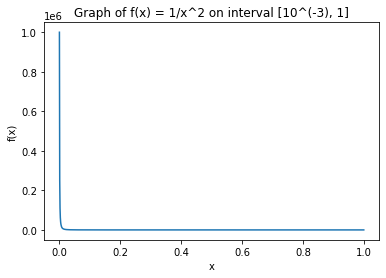

In [60]:
# Set paramters
a = (10**(-3))
b = 1
x = np.arange(a,b,a,dtype=float)
f = func2(x)

# Plot graph of f(x) over interval [a,b]
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = 1/x^2 on interval [10^(-3), 1]')
plt.show()

# (b) 
Use scipy.integrate.quad to compute $\int_a^b f(x) \, dx$ with an absolute error less than 1e-4. Compare with the true value of the integral.

In [61]:
# Compute integral of function f(x) using scipy.integrate.quad
y, abserr = quad(func2,a,b,epsabs=1.e-4)
print(f"Calculated integral using scipy.integrate.quad: {y}")
print(f"Absolute error: {abserr}")
print("\nAbsolute error tolerance set at 1e-4")

Calculated integral using scipy.integrate.quad: 999.0000000000119
Absolute error: 7.671666055295012e-05

Absolute error tolerance set at 1e-4


The true value of the integral of function $f(x) = \frac{1}{x^2}$ on interval $[a,b]$ with $a = 10^{-3}$ and $b = 1$ can be calculated as follows:
\
$f(x) = \frac{1}{x^2} = x^{-2}$
\
$F(x) = -x^{-1}$
\
\
Then,
\
$\int_a^b f(x) \, dx = [F(x)]_a^b = [-x^{-1}]_{10^{-3}}^1 = - \frac{1}{1} - -\frac{1}{10^{-3}} = 999$


# (c)
scipy.integrate.quad is an adaptive integration routine (book section 8.3.6), that automatically chooses an appropriate subdivision of the interval in subintervals. Therefore in some parts of the interval $[0,1]$ the function $f$ will be evaluated more often than in other parts. Divide the interval $[0,1]$ into bins $B_i = [h * (i-1), h*i]$, with $h=0.01$. For each bin $B_i$, count the number of times $f(x)$ is evaluated with $x$ in $B_i$. Make a histogram plot of these data. In which region is there a large number of function evaluations? Can you explain this, taking into account how $f$ is defined?

Hint: To know for which $x$ the function $f$ is evaluated, you can keep a global array `xVals` in which you store all values of $x$ for which the function $f$ is called. You can use a numpy array and use numpy.append to add new values to `xVals`.


In [62]:
xVals = np.empty(1)
print(xVals)

a = 0
b = 1

h = 0.01

values = np.random.random_sample(1000)
values = np.sort(values)

# 100 bins for interval [0,1] with h = 0.01
bins = []
for i in range(1,101):
    bins.append((h*(i-1),h*i))

print(bins[1][0])

y, abserr = quad(func2,bins[][0],bins[][1])


SyntaxError: invalid syntax (3923852762.py, line 19)

[(-0.01, 0.0), (0.0, 0.01), (0.01, 0.02), (0.02, 0.03), (0.03, 0.04), (0.04, 0.05), (0.05, 0.06), (0.06, 0.07), (0.07, 0.08), (0.08, 0.09)]
0
Calculated integral using scipy.integrate.quad with 10 bins: -100.0
Absolute error: 5.820766091346741e-11
1
Calculated integral using scipy.integrate.quad with 10 bins: -100.0
Absolute error: 5.820766091346741e-11
2
Calculated integral using scipy.integrate.quad with 10 bins: 50.0
Absolute error: 5.551115123125783e-13
3
Calculated integral using scipy.integrate.quad with 10 bins: 16.66666666666666
Absolute error: 1.8503717077085936e-13
4
Calculated integral using scipy.integrate.quad with 10 bins: 8.333333333333334
Absolute error: 9.251858538542972e-14
5
Calculated integral using scipy.integrate.quad with 10 bins: 5.000000000000002
Absolute error: 5.5511151231257846e-14
6
Calculated integral using scipy.integrate.quad with 10 bins: 3.3333333333333313
Absolute error: 3.7007434154171864e-14
7
Calculated integral using scipy.integrate.quad with 10 b

/var/folders/zb/qwtwsp1d539dg2nj7t84r7mc0000gn/T/ipykernel_34012/2454052938.py:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  y, abserr = quad(func2,bin[0],bin[1])


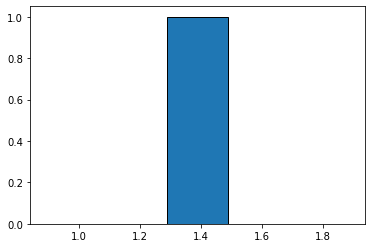

In [63]:
# YOUR CODE HERE
"""
TODO: ik snap eigenlijk niet echt hoe die scipy.integrate.quad meerdere keren een function f kan evaluaten
en
hoe je dat resultaat dan kan returnen uit de method

Ik denk dat ik de bins goed heb gemaakt
"""

# xVals = np.empty()
# print(xVals)

a = 0
b = 1

h = 0.01
interval = np.arange(a,b,h)

bins = []
for i in range(10):
    bins.append((h*(i-1),h*i))
    
print(bins)

for index,bin in enumerate(bins):
    y, abserr = quad(func2,bin[0],bin[1])
    
    print(index)
    print(f"Calculated integral using scipy.integrate.quad with 10 bins: {y}")
    print(f"Absolute error: {abserr}")
    
plt.hist(y, edgecolor="black", bins=5)
plt.show()

Your answer here.